# Investigating Titanic Dataset

## <center>Data Dictionary</center>

| Variable        | Definition          | Key  |
| ------------- |:-------------:| -----:|
| survival     | Survival | 0=No, 1=Yes |
| pclass      | Ticket Class      |  1 = 1st, 2 = 2nd, 3 = 3rd  |
| sex | Sex      |     |
| sibsp |  No of siblings/spouses aboard the Titanic |     |
| parch |  No of parents/childern aboard the Titanic |     |
| ticket |  Ticket Number |     |
| fare |  Passenger fare |     |
| cabin|  Cabin Number |     |
| Embarked | Port of Embarkation  |   C = Cherbourg, Q = Queenstown, S = Southampton  |
   	           

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading Data

In [2]:
data = pd.read_csv('titanic-data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Total records

In [3]:
print "Total rows in data: " + str(data.shape[0])
print "The data has " + str(data['PassengerId'].unique().shape[0]) + " passengers"

Total rows in data: 891
The data has 891 passengers


### Checking if some  of the columns have null values

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Looks like we don't have age for some passengers, and cabin number is missing  for almost 80% of data. We will drop cabin column

In [5]:
data.drop(axis=1,labels= ['Cabin'],inplace=True)

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Filling empty embarked columns with most frequent value

In [7]:
data[data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [8]:
most_freq_emb = data['Embarked'].sort_values(ascending=False).iloc[0]
data.Embarked.fillna(most_freq_emb,inplace=True)

In [9]:
print data[data['PassengerId']==62]
print data[data['PassengerId']==830]

    PassengerId  Survived  Pclass                 Name     Sex   Age  SibSp  \
61           62         1       1  Icard, Miss. Amelie  female  38.0      0   

    Parch  Ticket  Fare Embarked  
61      0  113572  80.0        S  
     PassengerId  Survived  Pclass                                       Name  \
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Embarked  
829  female  62.0      0      0  113572  80.0        S  


# What factors made people more likely to survive?

This is a very general question. Instead , we will look at factors that made people more likely to survive.
01.  Gender 
2.  Passenger Class 

In [10]:
def survival_rate(data,column,t):  ##Function that plots survival rate of a particular column. t=type of plot required
    df = pd.DataFrame()
    df['Total'] = data.groupby(column).size()
    df['Survived'] = data.groupby(column).sum()['Survived']
    df['Percentage']= df['Survived']/df['Total']*100
    df['Survived'].plot(kind=t)
    df['Total'].plot(kind=t,alpha=0.5,title="Survivors per "+str(column))
    plt.xticks(rotation=30)
    plt.show()
    return df

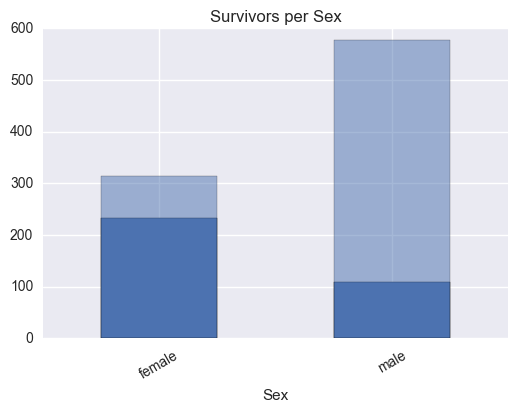

In [11]:
df = survival_rate(data,'Sex','bar')

Looks like female percentage of survivors were more and that is true because at the time of  titaninc sinking, women and children were evacuated first.

### Let's check survival rate according to the Passenger class

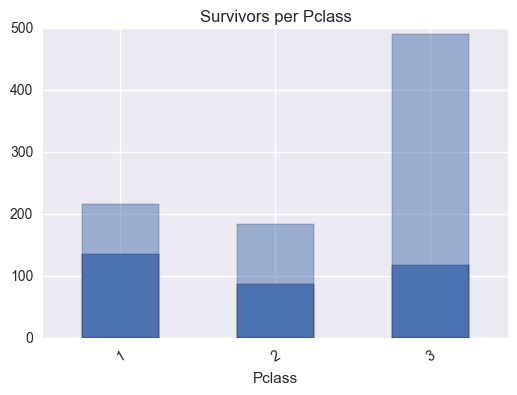

,Total,Survived,Percentage
Pclass,,,
1,216,136,62.962963
2,184,87,47.282609
3,491,119,24.236253


In [12]:
survival_rate(data,'Pclass','bar')

First class passengers survived more than the rest. This can be true because the first class rooms were at the top of the ship and easily accessible  to the safety boats. Let's dig a little deeper .

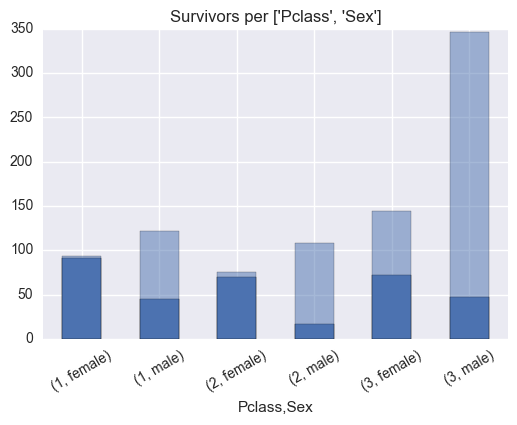

Total  Survived  Percentage
Pclass Sex                                
1      female     94        91   96.808511
       male      122        45   36.885246
2      female     76        70   92.105263
       male      108        17   15.740741
3      female    144        72   50.000000
       male      347        47   13.544669

In [13]:
survival_rate(data,['Pclass','Sex'],'bar')

From this plot, we can see that almost all first class females survived the sinking.

##  Survival rate according to age

The following section checks the age distribution. First some data manipulation will be done:
1. The data set contain ages less than 1 .Those will be changed to 1.
2. Create new column with groups of age, in 10 years ranges.


In [14]:
def age_group(value):  ## This function takes an age as input and convert it into proper age group
    if value <= 10:
        return "0-10"
    elif value <= 20:
        return "10-20"
    elif value <= 30:
        return "20-30"
    elif value <= 40:
        return "30-40"
    elif value <= 50:
        return "40-50"
    elif value <= 60:
        return "50-60"
    elif value <= 70:
        return "60-70"
    elif value <= 80:
        return "70-80"
    elif value <= 90:
        return "80-90"
    else:
        return "No data"
def age_less_than_one(value):
    if value<1:
        return 1
    else:
        return value

In [15]:
print("*** Number of people with age less than 1 (months):")
print(data[data["Age"] < 1.0].shape[0])

*** Number of people with age less than 1 (months):
7


In [16]:
data['Age'] = data['Age'].apply(age_less_than_one)
data['AgeGroup'] = data['Age'].apply(age_group)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,20-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,30-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,20-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,30-40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,30-40


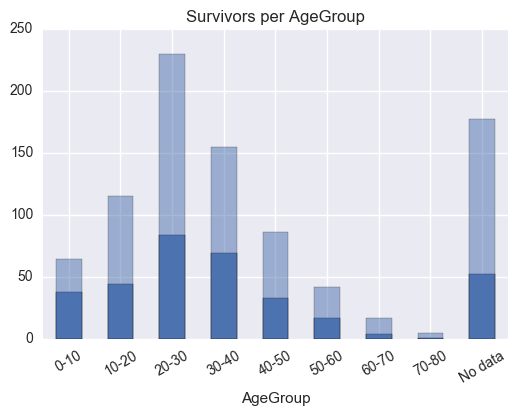

,Total,Survived,Percentage
AgeGroup,,,
0-10,64,38,59.375000
10-20,115,44,38.260870
20-30,230,84,36.521739
30-40,155,69,44.516129
40-50,86,33,38.372093
50-60,42,17,40.476190
60-70,17,4,23.529412
70-80,5,1,20.000000
No data,177,52,29.378531


In [17]:
survival_rate(data,'AgeGroup','bar')

### Survival  by agegroup and sex

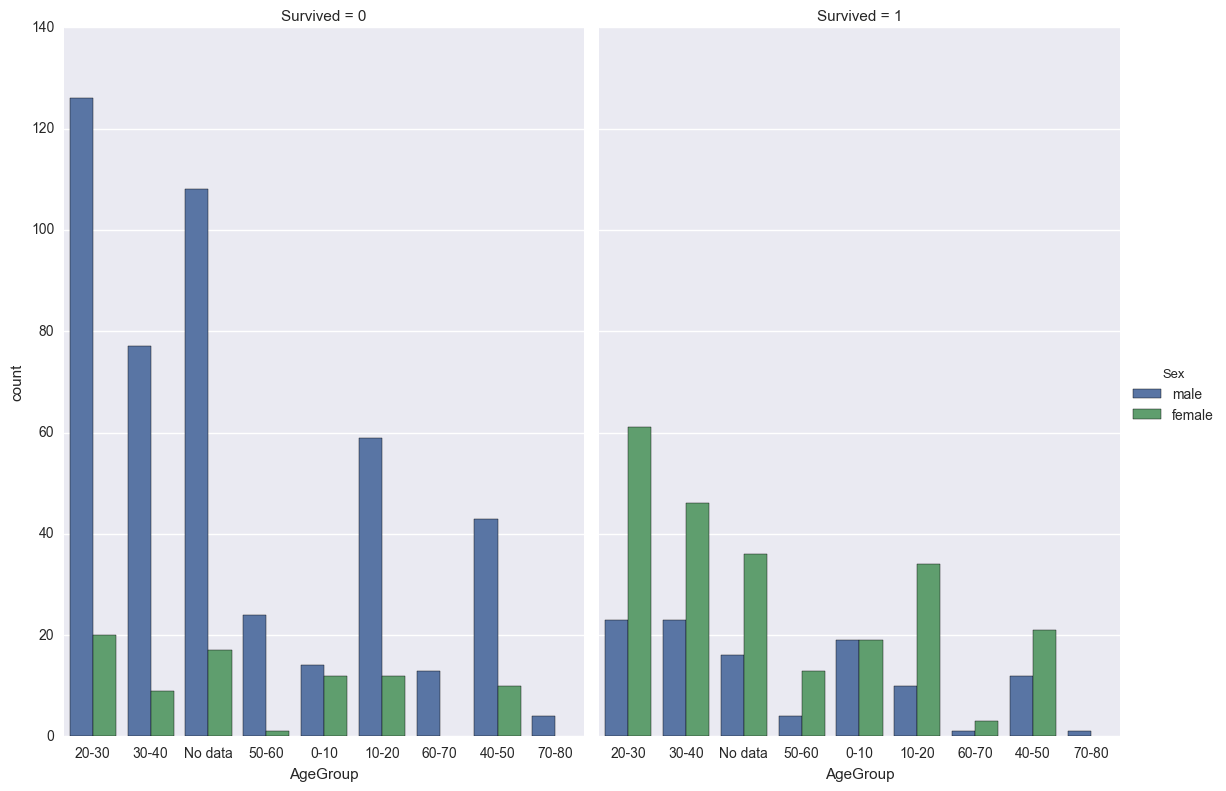

In [18]:
sns.factorplot(x='AgeGroup',hue='Sex',col='Survived',data=data,kind='count',size=8, aspect=.7)

### Let's check the average fare per class

This section  takes a look at the fare statistics and it's distribution according to passenger class. 

### Histogram of fare distribution in the dataset.

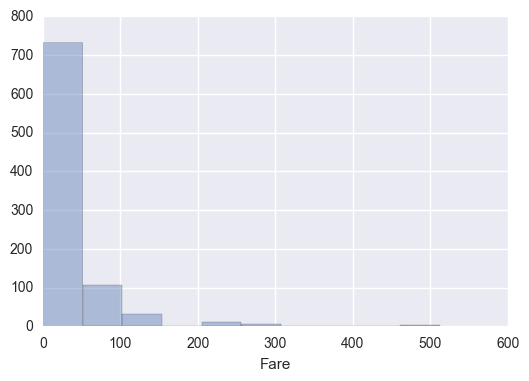

In [19]:
sns.distplot(data['Fare'], kde=False, rug=False,bins=10)

This shows that most of the fare is less than  150. Let's check if it is true.

In [20]:
print "***Count of passengers with fares less than 150***"
print data[data['Fare']<=150].count()['PassengerId']
print "***Count of passengers with fares between 150 and 300***"
print data[(data['Fare']>150) & (data['Fare']<=300)].count()['PassengerId']
print "***Count of passengers with fares greater than 300***"
print data[data['Fare']>=300].count()['PassengerId']

***Count of passengers with fares less than 150***
862
***Count of passengers with fares between 150 and 300***
26
***Count of passengers with fares greater than 300***
3


Yep, it's true.

Some statistics of the fare column.

In [21]:
data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Oh boy, minimum value is 0. Looks like people paid nothing. Let's check them out.

In [22]:
zero_fare = data[data["Fare"] == 0]
print(zero_fare[["Name","Sex","Age","Pclass","Survived"]])

                                 Name   Sex   Age  Pclass  Survived
179               Leonard, Mr. Lionel  male  36.0       3         0
263             Harrison, Mr. William  male  40.0       1         0
271      Tornquist, Mr. William Henry  male  25.0       3         1
277       Parkes, Mr. Francis "Frank"  male   NaN       2         0
302   Johnson, Mr. William Cahoone Jr  male  19.0       3         0
413    Cunningham, Mr. Alfred Fleming  male   NaN       2         0
466             Campbell, Mr. William  male   NaN       2         0
481  Frost, Mr. Anthony Wood "Archie"  male   NaN       2         0
597               Johnson, Mr. Alfred  male  49.0       3         0
633     Parr, Mr. William Henry Marsh  male   NaN       1         0
674        Watson, Mr. Ennis Hastings  male   NaN       2         0
732              Knight, Mr. Robert J  male   NaN       2         0
806            Andrews, Mr. Thomas Jr  male  39.0       1         0
815                  Fry, Mr. Richard  male   Na

Well well, only 1 survived.

Let's check the average fare per passenger class.

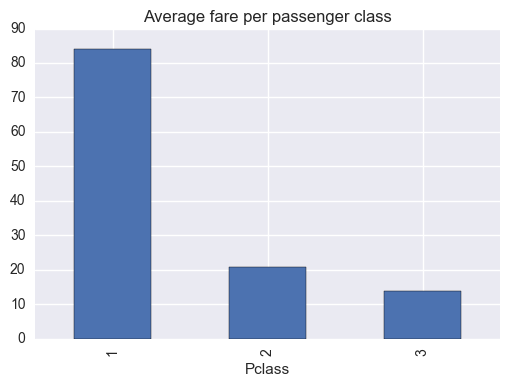

In [23]:
data.groupby(['Pclass']).mean()['Fare'].plot(kind='bar',title='Average fare per passenger class')
plt.show()

### Let's  also check the survival rate of embarked  column

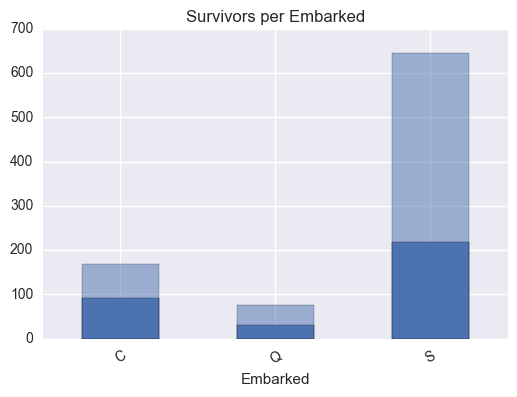

,Total,Survived,Percentage
Embarked,,,
C,168,93,55.357143
Q,77,30,38.961039
S,646,219,33.900929


In [24]:
survival_rate(data,'Embarked','bar')

## Conclusion

Through this notebook we noticed the following things:-
1. Female passengers had a higher survival rate  than male in all the passenger classes. Most of the first class females survived.
2.  People with age between 0-10 survived more than the rest.
3. First class passengers had a higher survival rate.


##### Limitations
1. The difference between the sample and the population, we don't know how the sample was chosen from the actual population of people that were on the Titanic. 
2. There could have been some sort of intentional or unintentional bias in how the sample was selected.
3.  The age  for approx 200 people was missing, which could affect the analysis we have done based  on age.
